In [90]:
# 데이터 프레임
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 회귀 예측 모델
from statsmodels.api import Logit

# 사이킷런
## 데이터 정제
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

## 분류 모델
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
### 분류-TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## 그리드 서치
from sklearn.model_selection import GridSearchCV

## 평가
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 
from subprocess import call

# 경고메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 폰트 설정
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus=False)

In [91]:
df_sales_itemsNprice_POS = pd.read_csv("CU_SOON/data/users_itemsCategory.csv")
df_sales_itemsNprice_POS

,idUser,idPOS,SalesDate,Price,간편식사_도시락,간편식사_샌드위치,간편식사_주먹밥,과자류_껌/초,과자류_빵/디,과자류_스낵,...,즉석조리_베이커,즉석조리_즉석커,즉석조리_튀김류,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup
0,U100001,10004,2021-01-03,6500,0,0,0,0,0,0,...,0,0,0,2021,1,3,6,07:08:12,남성,40대
1,U100001,10006,2021-01-07,750,0,0,0,0,0,0,...,0,0,0,2021,1,7,3,00:42:18,남성,40대
2,U100001,10008,2021-01-10,1000,0,0,0,0,0,0,...,0,0,0,2021,1,10,6,18:16:24,남성,40대
3,U100277,10082,2022-04-12,1700,0,0,0,0,0,0,...,0,0,1,2022,4,12,1,11:59:22,여성,30대
4,U100277,10083,2022-04-14,2700,0,0,0,0,0,0,...,0,0,0,2022,4,14,3,01:34:37,여성,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215613,U101098,10400,2021-12-31,1500,0,0,0,0,0,1,...,0,0,0,2021,12,31,4,00:26:40,남성,30대
215614,U101098,10402,2022-01-01,5300,0,0,0,0,1,1,...,0,0,0,2022,1,1,5,23:34:00,남성,30대
215615,U101098,10409,2022-01-08,19100,0,0,0,0,0,0,...,0,0,0,2022,1,8,5,02:29:40,남성,30대
215616,U101098,10410,2022-01-09,2500,0,0,0,0,0,1,...,0,0,0,2022,1,9,6,20:03:20,남성,30대


In [92]:
df_sales_itemsNprice_POS['AgeGroup'].unique()

array(['40대', '30대', '20대', '50대', '10대', '60대이상'], dtype=object)

In [93]:
df_cat_man = df_sales_itemsNprice_POS[df_sales_itemsNprice_POS['Gender']=='남성'].iloc[:,4:20].sum().to_frame()
df_cat_man.columns = ['남성']
df_cat_woman = df_sales_itemsNprice_POS[df_sales_itemsNprice_POS['Gender']=='여성'].iloc[:,4:20].sum().to_frame()
df_cat_woman.columns = ['여성']
df_cat_Gender = pd.concat([df_max_cat_man,df_max_cat_woman],axis=1)
# df_cat_Gender = df_cat_Gender.sort_values(by='남성',ascending=False)

df_cat_10g = df_sales_itemsNprice_POS[df_sales_itemsNprice_POS['AgeGroup']=='10대'].iloc[:,4:20].sum().to_frame()
df_cat_10g.columns = ['10대']
df_cat_20g = df_sales_itemsNprice_POS[df_sales_itemsNprice_POS['AgeGroup']=='20대'].iloc[:,4:20].sum().to_frame()
df_cat_20g.columns = ['20대']
df_cat_30g = df_sales_itemsNprice_POS[df_sales_itemsNprice_POS['AgeGroup']=='30대'].iloc[:,4:20].sum().to_frame()
df_cat_30g.columns = ['30대']
df_cat_40g = df_sales_itemsNprice_POS[df_sales_itemsNprice_POS['AgeGroup']=='40대'].iloc[:,4:20].sum().to_frame()
df_cat_40g.columns = ['40대']
df_cat_50g = df_sales_itemsNprice_POS[df_sales_itemsNprice_POS['AgeGroup']=='50대'].iloc[:,4:20].sum().to_frame()
df_cat_50g.columns = ['50대']
df_cat_60g = df_sales_itemsNprice_POS[df_sales_itemsNprice_POS['AgeGroup']=='60대이상'].iloc[:,4:20].sum().to_frame()
df_cat_60g.columns = ['60대이상']
df_cat_AgeGroup = pd.concat([df_cat_10g, df_cat_20g, df_cat_30g, df_cat_40g, df_cat_50g, df_cat_60g],axis=1)
# df_cat_AgeGroup = df_cat_AgeGroup.sort_values(by='30대',ascending=False)

Text(0, 0.5, '판매량 (단위: 개)')

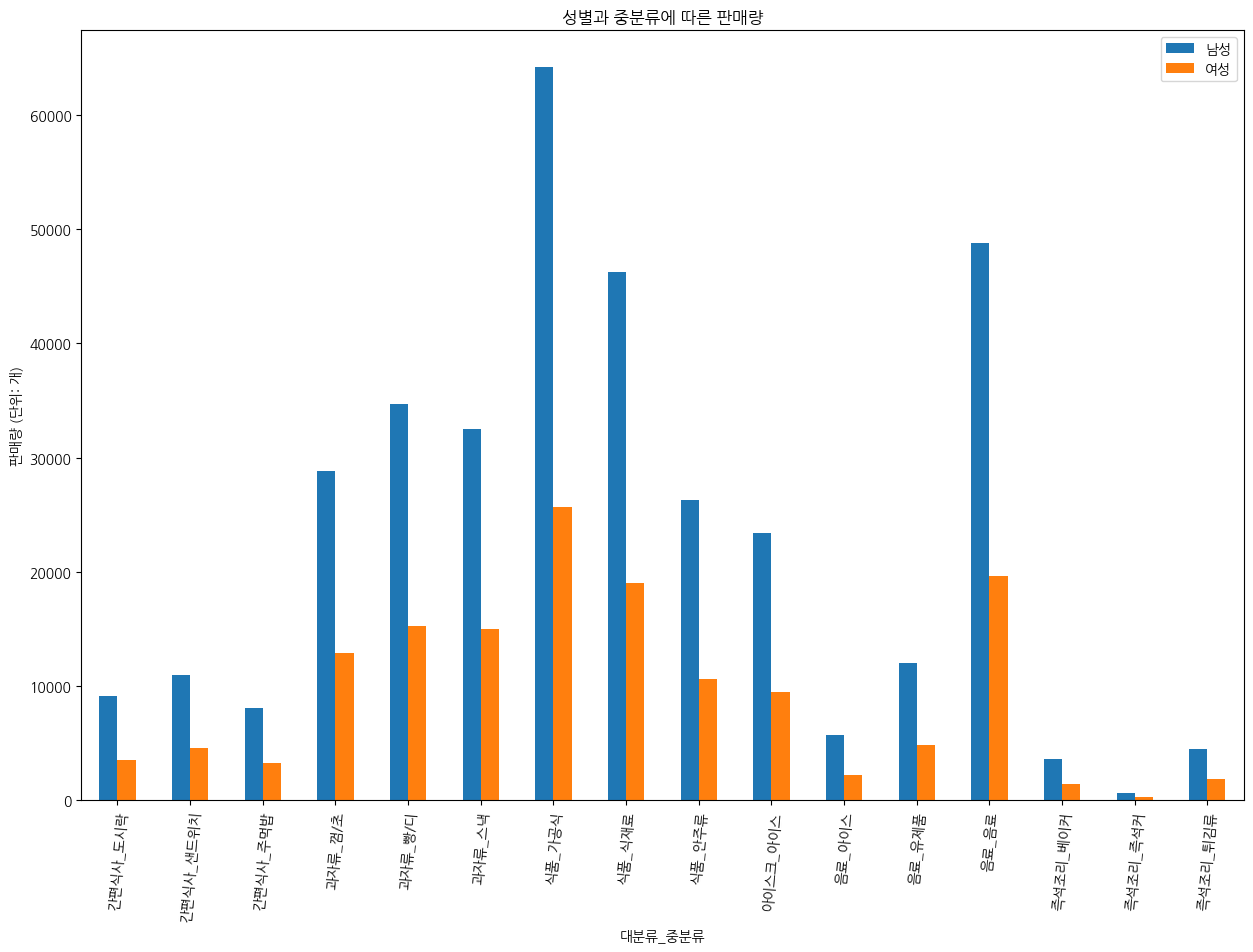

In [104]:
df_cat_Gender.plot.bar(figsize=(15,10))
plt.title("성별과 중분류에 따른 판매량")
plt.xlabel("대분류_중분류")
plt.xticks(rotation=85)
plt.ylabel("판매량 (단위: 개)")

Text(0, 0.5, '판매량 (단위: 개)')

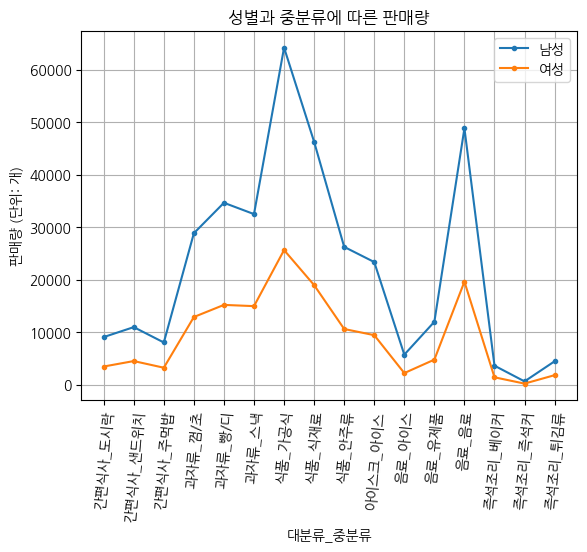

In [121]:
plt.plot(df_cat_Gender,'.-')
plt.grid()
plt.title("성별과 중분류에 따른 판매량")
plt.xlabel("대분류_중분류")
plt.xticks(rotation=85)
plt.legend(df_cat_Gender.columns)
plt.ylabel("판매량 (단위: 개)")

Text(0, 0.5, '판매량 (단위: 개)')

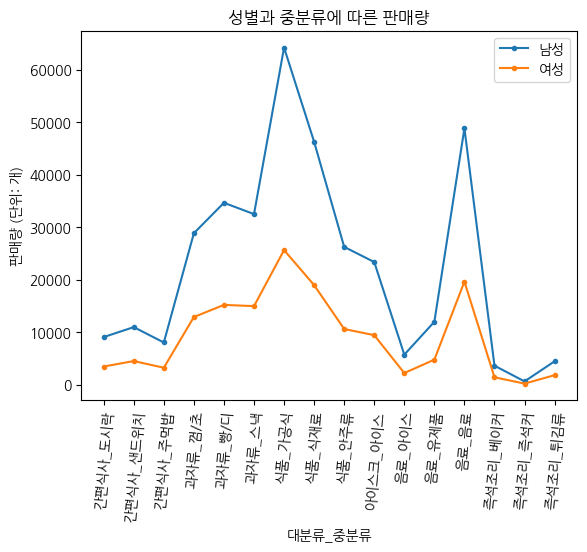

In [122]:
plt.plot(df_cat_Gender,'.-')
# plt.grid()
plt.title("성별과 중분류에 따른 판매량")
plt.xlabel("대분류_중분류")
plt.xticks(rotation=85)
plt.legend(df_cat_Gender.columns)
plt.ylabel("판매량 (단위: 개)")

Text(0, 0.5, '판매량 (단위: 개)')

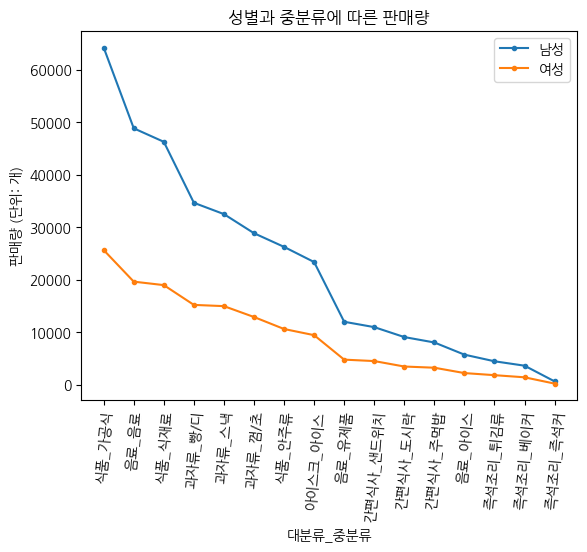

In [123]:
plt.plot(df_cat_Gender.sort_values(by='남성',ascending=False),'.-')
# plt.grid()
plt.title("성별과 중분류에 따른 판매량")
plt.xlabel("대분류_중분류")
plt.xticks(rotation=85)
plt.legend(df_cat_Gender.columns)
plt.ylabel("판매량 (단위: 개)")

Text(0, 0.5, '판매량 (단위: 개)')

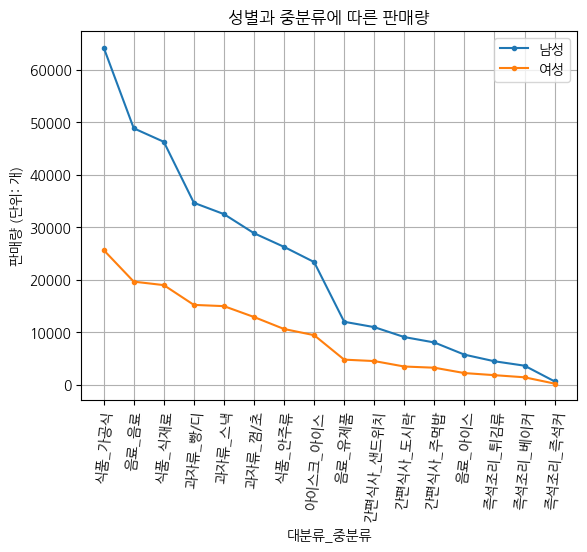

In [124]:
plt.plot(df_cat_Gender.sort_values(by='남성',ascending=False),'.-')
plt.grid()
plt.title("성별과 중분류에 따른 판매량")
plt.xlabel("대분류_중분류")
plt.xticks(rotation=85)
plt.legend(df_cat_Gender.columns)
plt.ylabel("판매량 (단위: 개)")

Text(0, 0.5, '판매량 (단위: 개)')

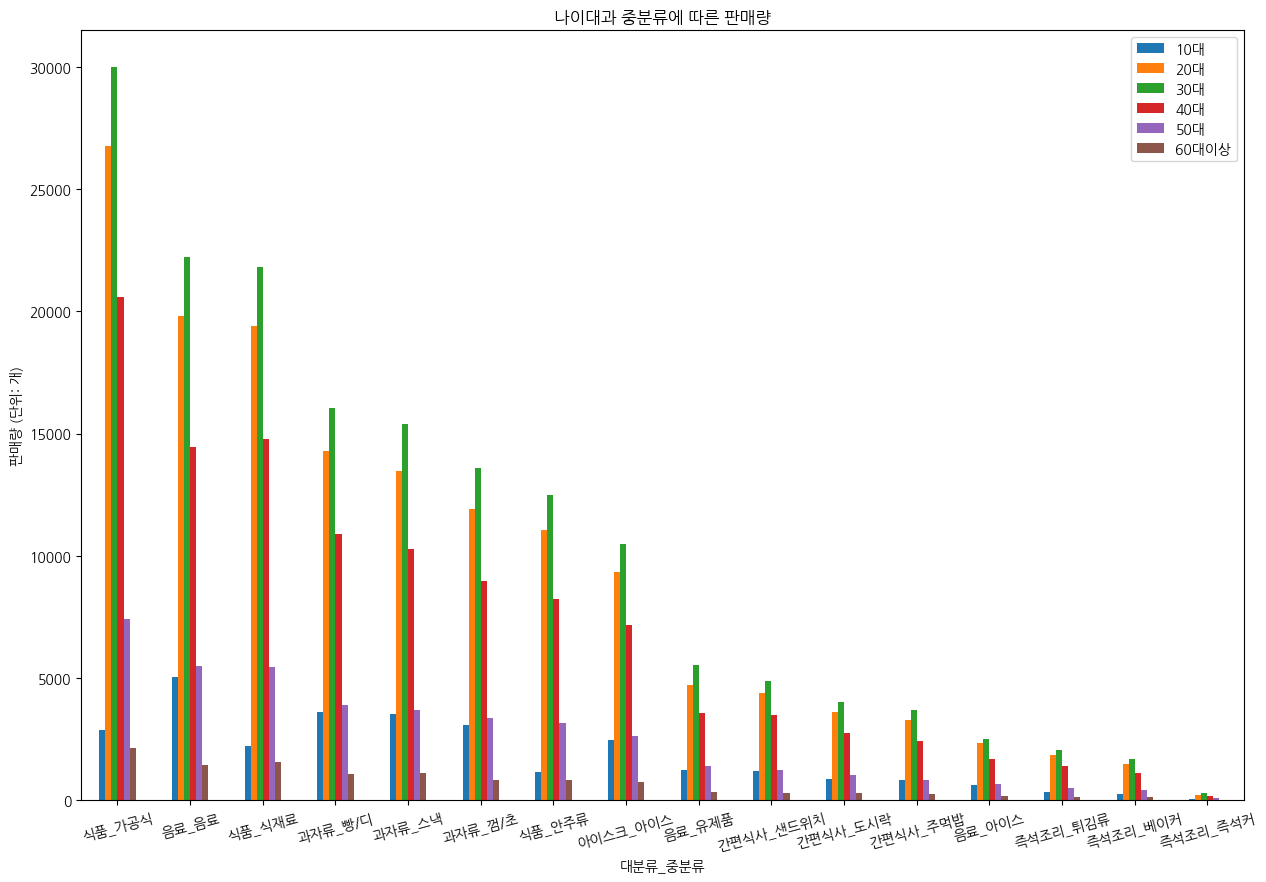

In [89]:
df_cat_AgeGroup.plot.bar(figsize=(15,10))
plt.title("나이대과 중분류에 따른 판매량")
plt.xlabel("대분류_중분류")
plt.xticks(rotation=15)
plt.ylabel("판매량 (단위: 개)")

Text(0, 0.5, '판매량 (단위: 개)')

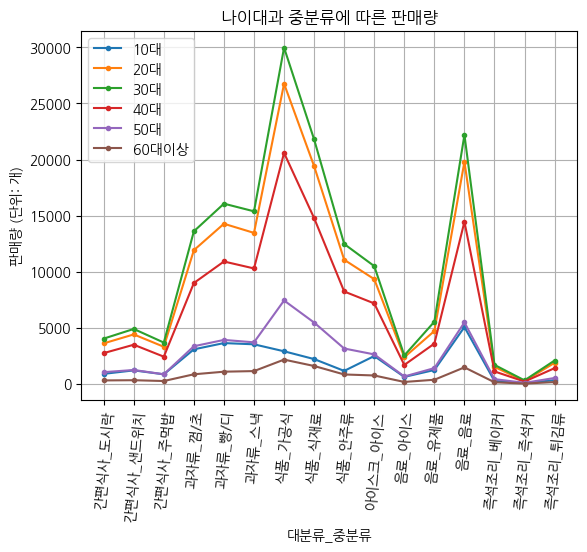

In [125]:
plt.plot(df_cat_AgeGroup,'.-')
plt.grid()
plt.title("나이대과 중분류에 따른 판매량")
plt.xlabel("대분류_중분류")
plt.xticks(rotation=85)
plt.legend(df_cat_AgeGroup.columns)
plt.ylabel("판매량 (단위: 개)")

Text(0, 0.5, '판매량 (단위: 개)')

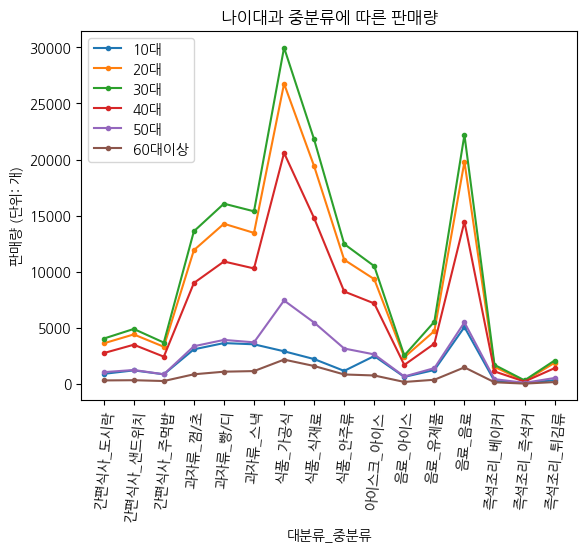

In [126]:
plt.plot(df_cat_AgeGroup,'.-')
# plt.grid()
plt.title("나이대과 중분류에 따른 판매량")
plt.xlabel("대분류_중분류")
plt.xticks(rotation=85)
plt.legend(df_cat_AgeGroup.columns)
plt.ylabel("판매량 (단위: 개)")

Text(0, 0.5, '판매량 (단위: 개)')

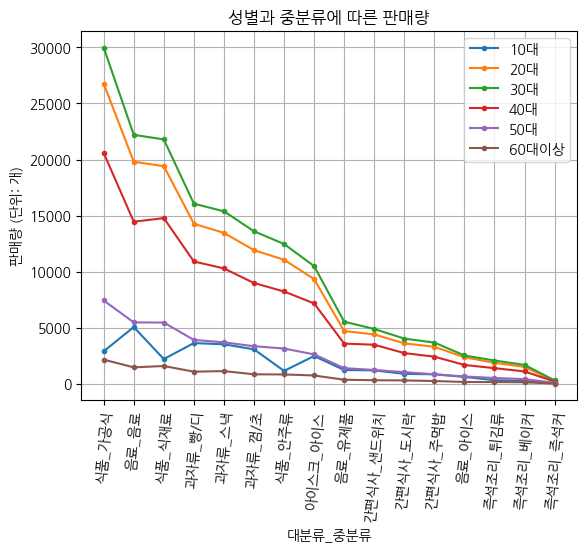

In [127]:
plt.plot(df_cat_AgeGroup.sort_values(by='30대',ascending=False),'.-')
plt.grid()
plt.title("성별과 중분류에 따른 판매량")
plt.xlabel("대분류_중분류")
plt.xticks(rotation=85)
plt.legend(df_cat_AgeGroup.columns)
plt.ylabel("판매량 (단위: 개)")

Text(0, 0.5, '판매량 (단위: 개)')

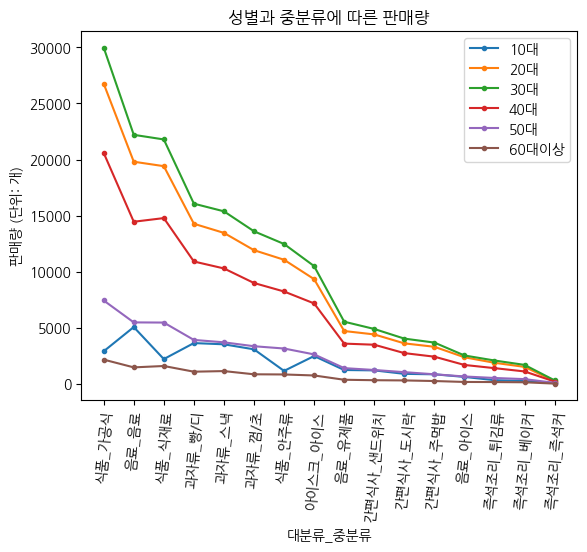

In [128]:
plt.plot(df_cat_AgeGroup.sort_values(by='30대',ascending=False),'.-')
# plt.grid()
plt.title("성별과 중분류에 따른 판매량")
plt.xlabel("대분류_중분류")
plt.xticks(rotation=85)
plt.legend(df_cat_AgeGroup.columns)
plt.ylabel("판매량 (단위: 개)")